# Задание 1.

Поработаем с датасетом Black Friday. Есть его описание:

Description

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv(r"C:\Users\lizao\Desktop\smth\маг ооп\BlackFriday.csv")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
set(data.City_Category)

{'A', 'B', 'C'}

# Подготовка данных

In [4]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


Скорее всего NaN-ы в Product_Category_2 и Product_Category_3 означают, что человек не покупал продукты из этих категорий.

Поэтому можем заменить эти пропущенные значения на 0.

In [5]:
data = data.fillna(0)

In [6]:
data.shape

(537577, 12)

In [7]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Series([], dtype: float64) %


Посмотрим, какие типы данных есть в нашем датасете. 

Выведите на экран тип каждой колонки в таблице.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          537577 non-null  float64
 10  Product_Category_3          537577 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Обработаем нечисловые колонки.

1) Выведите на экран все возможные значения из столбца Gender.

2) Замените значение 'M' на 1, а 'F' на 0.

In [8]:
data.Gender = data.Gender.apply(lambda x: 1 if 'M' else 0)

Поработаем со столбцом Age.

1) Выведите на экран все возможные значения из столбца Age.

2) Напишите функцию для перевода каждого диапазона возрастов в число (самые маленькие возрасты - 0, следующий диапазон - 1 и т.д.). Замените значения в столбце Age на числовые, применив эту функцию.

In [9]:
#your code here

def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
    
data['Age'] = data['Age'].apply(map_age)

In [10]:
set(data.Age)

{0, 1, 2, 3, 4, 5, 6}

Обработаем столбец City_Category.

1) Выведите все уникальные значения данного столбца.

2) Закодируйте столбец с помощью OneHotEncoding (get_dummies).

In [11]:
data = pd.get_dummies(data, columns=['City_Category'], drop_first = True)

Наконец, обработаем Stay_In_Current_City_Years.

1) Выведите на экран все уникальные значения данного столбца.

2) Замените '4+' на 4, а все остальные значения оставьте как есть, но переведите их в числовой вид (x -> int(x)).

In [12]:
#your code here

def map_stay(years):
    if years == '4+':
        return 4
    else:
        return int(years)
    
data['Stay_In_Current_City_Years'] = \
    data['Stay_In_Current_City_Years'].apply(map_stay)

In [13]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,1000001,P00069042,1,0,10,2,0,3,0.0,0.0,8370,False,False
1,1000001,P00248942,1,0,10,2,0,1,6.0,14.0,15200,False,False
2,1000001,P00087842,1,0,10,2,0,12,0.0,0.0,1422,False,False
3,1000001,P00085442,1,0,10,2,0,12,14.0,0.0,1057,False,False
4,1000002,P00285442,1,6,16,4,0,8,0.0,0.0,7969,False,True


Удалим столбцы User_ID и Product_ID.

In [14]:
data.drop(['User_ID', 'Product_ID'], axis = 1, inplace=True)

In [15]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,1,0,10,2,0,3,0.0,0.0,8370,False,False
1,1,0,10,2,0,1,6.0,14.0,15200,False,False
2,1,0,10,2,0,12,0.0,0.0,1422,False,False
3,1,0,10,2,0,12,14.0,0.0,1057,False,False
4,1,6,16,4,0,8,0.0,0.0,7969,False,True


# Исследование данных

1. Как влияет пол на целевую переменную Purchase? Постройте диаграмму.

2. Как влияет возраст на целевую переменную Purchase? Постройте диаграмму.

3. Как влияет City_Category на целевую переменную Purchase? Постройте диаграмму для каждой закодированной категории.

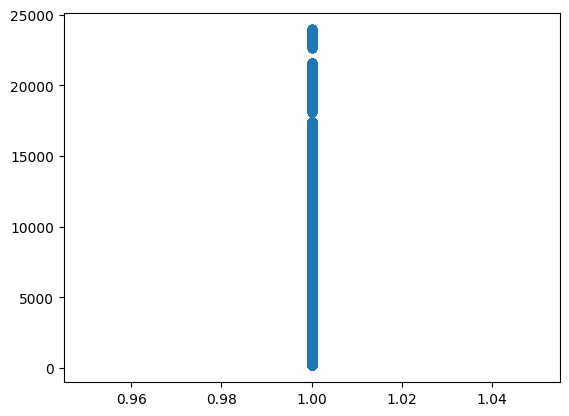

In [16]:
from matplotlib import pylab as plt

%matplotlib inline
plt.scatter(data['Gender'], data['Purchase'])
plt.show()

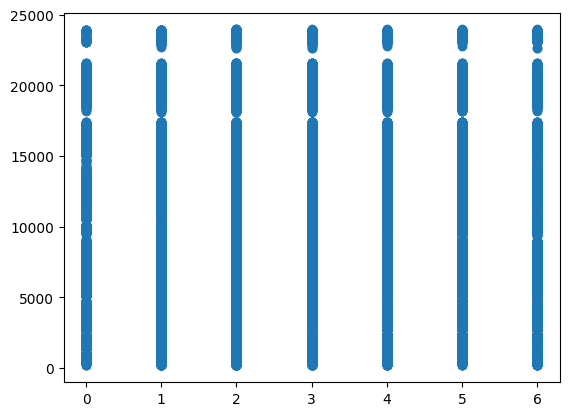

In [17]:
from matplotlib import pylab as plt

%matplotlib inline
plt.scatter(data['Age'], data['Purchase'])
plt.show()

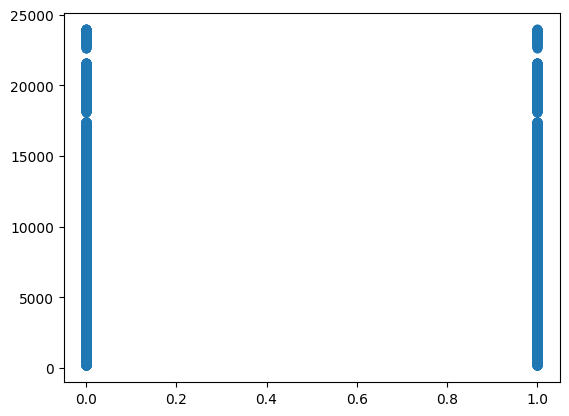

In [19]:
from matplotlib import pylab as plt

%matplotlib inline
plt.scatter(data['City_Category_B'], data['Purchase'])
plt.show()

Нарисуйте матрицу корреляций признаков.

<Axes: >

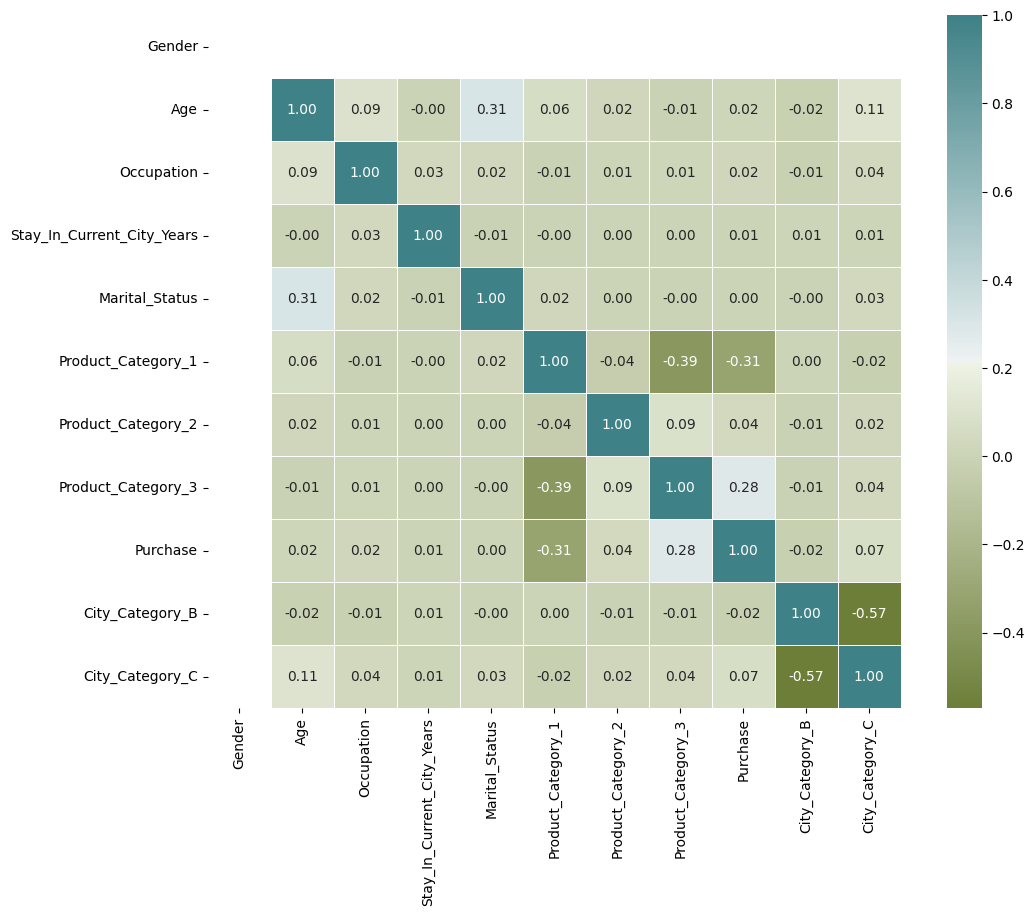

In [21]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

# Построение модели

Применим к нашим данным масштабирование: для того, чтобы модель лучше училась, будет неплохо привести все признаки к одному масштабу, иначе могут возникнуть проблемы с коэффициентами: если какой-то признак принимает очень большие значения, а другой - маленькие, модели будет сложно корректно подобрать веса. 

Стандартная формула для масштабирования:

$\hat{x} = \frac{x - \mu}{\sigma}$

In [23]:
X = data.copy()

y = data['Purchase']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain) #маштабирование
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)
print(ypred_test)

[9870. 8006. 5379. ... 7507. 4201. 5295.]


In [24]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

(1.0, 1.0)

In [25]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Gender,0.000000e+00
1,Age,-1.364242e-12
2,Occupation,-1.705303e-12
3,Stay_In_Current_City_Years,1.818989e-12
4,Marital_Status,-2.614797e-12
5,Product_Category_1,1.165290e-12
6,Product_Category_2,1.250555e-12
7,Product_Category_3,-3.126388e-12
8,Purchase,4.979211e+03
9,City_Category_B,7.958079e-13


In [30]:
regressor = LinearRegression()
plt(regressor.coef_)

NameError: name 'plot' is not defined

Добавим L1 регуляризацию.

In [31]:
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

Scores: 0.9999959665288067 100.36288915977656
[   0.            0.            0.            0.            0.
   -0.            0.            0.         4969.21091717   -0.
    0.        ] 



Посмотрим, что происходит при разных значениях параметра регуляризации $\alpha$

In [32]:
for a in np.arange(0.1,100.1,25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.9999999995726405 0.010633776668040674
[   0.           -0.            0.            0.           -0.
   -0.            0.            0.         4979.10798356   -0.
    0.        ] 

alpha=25.1
Scores: 0.9999745887281353 632.2962379954115
[   0.            0.            0.            0.            0.
   -0.            0.            0.         4954.11091717   -0.
    0.        ] 

alpha=50.1
Scores: 0.9998987594697019 2519.118554198976
[   0.            0.            0.            0.            0.
   -0.            0.            0.         4929.11091717   -0.
    0.        ] 

alpha=75.1
Scores: 0.9997725118213527 5660.476984899336
[   0.            0.            0.            0.            0.
   -0.            0.            0.         4904.11091717   -0.
    0.        ] 



**Видим, что L1-регуляризация зануляет некоторые веса и таким образом производит отбор признаков.**

Подберем оптимальное значение параметра регуляризации по кросс-валидации

In [33]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17)

In [34]:
lasso_cv.coef_

array([ 0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  1., -0.,  0.])

In [35]:
lasso_cv.alpha_

0.1

Обучим модель с найденным параметром регуляризации $\alpha$

In [36]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

Scores: 0.9999999995726405 0.9999999995726405


Добавим L2 регуляризацию.

In [37]:
from sklearn.linear_model import Ridge

for a in np.arange(-10,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

InvalidParameterError: The 'alpha' parameter of Ridge must be a float in the range [0, inf) or an instance of 'numpy.ndarray'. Got -10.0 instead.

**Ridge регрессия не зануляет веса (они могут быть очень маленькими, но ненулевыми).**

Теперь подберем оптимальное a по кросс-валидации.

In [ ]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

In [ ]:
ridge_cv.alpha_

In [ ]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r3_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Добавим одновременно и L1, и L2 регуляризацию.

У ElasticNet два параметра: alpha и l1_ratio. Используйте ElasticNet со значениями параметров alpha и l1_ratio равными 0.5.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [ ]:
from sklearn.linear_model import ElasticNet

#your code here

### Посмотрим на веса, которые присвоила линейная регрессия признакам (regressor.coef_).

In [ ]:
#your code here
regressor3.coef_

Можно записать эти веса в таблицу рядом с названиями признаков (для удобства).

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor3.coef_))], axis = 1)
coefficients

In [ ]:
len(data),len(Xtest)

# Задание 2

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

1. Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

2. Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test,
обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

3. Посмотрите на матрицу корреляций факторов и целевой переменной. 
Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

Если есть факторы, слабо коррелирующие с таргетом, удалите их.

Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

In [15]:
data = pd.read_csv(r"C:\Users\lizao\Desktop\smth\маг ооп\affairs.csv")
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


<Axes: >

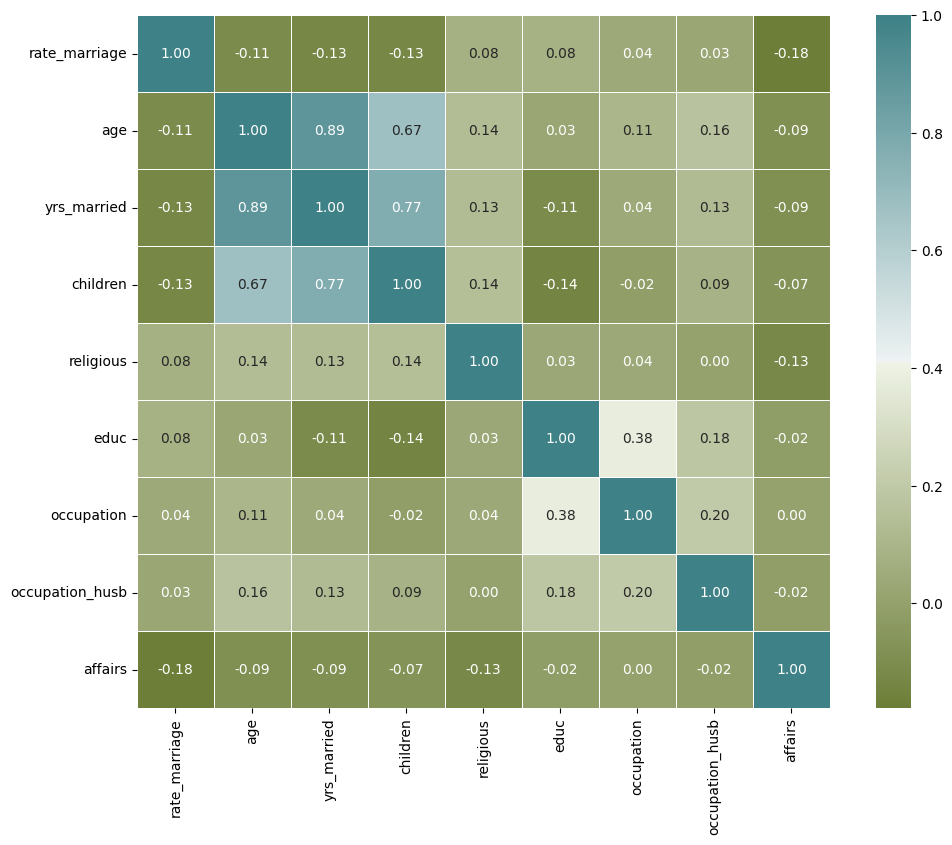

In [12]:

import seaborn as sns
plt.figure(figsize=(12, 9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

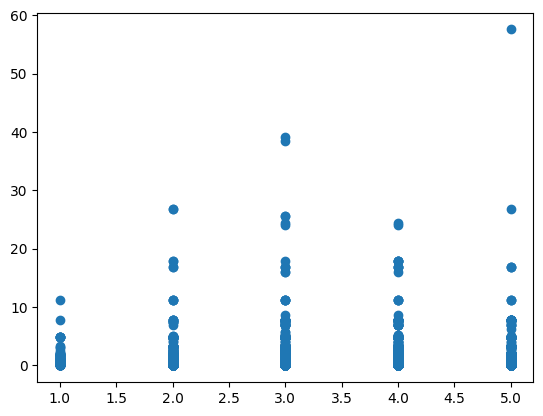

In [13]:
from matplotlib import pylab as plt

%matplotlib inline
plt.scatter(data['rate_marriage'], data['affairs'])
plt.show()

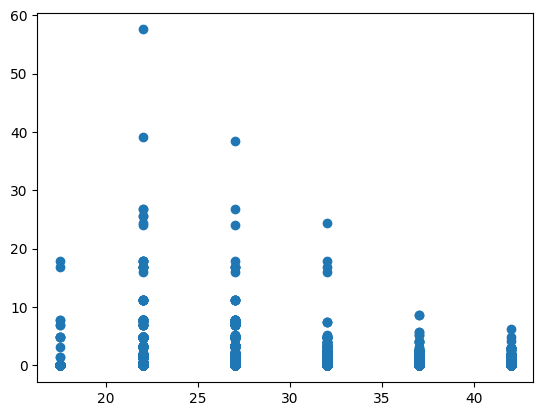

In [41]:
from matplotlib import pylab as plt

%matplotlib inline
plt.scatter(data['age'], data['affairs'])
plt.show()

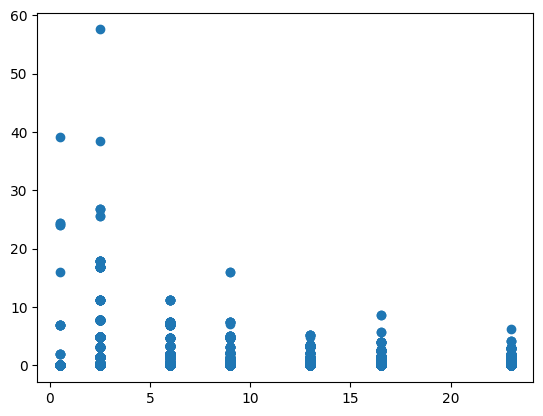

In [42]:
from matplotlib import pylab as plt

%matplotlib inline
plt.scatter(data['yrs_married'], data['affairs'])
plt.show()

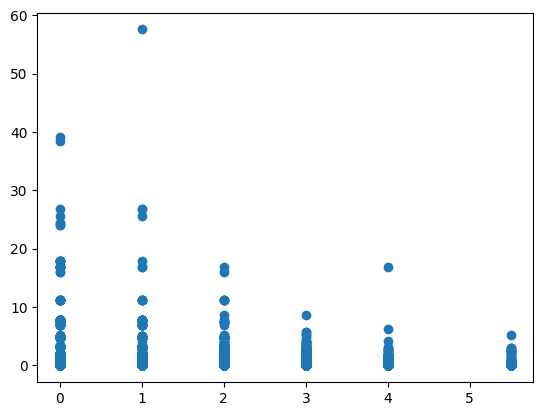

In [43]:
from matplotlib import pylab as plt

%matplotlib inline
plt.scatter(data['children'], data['affairs'])
plt.show()

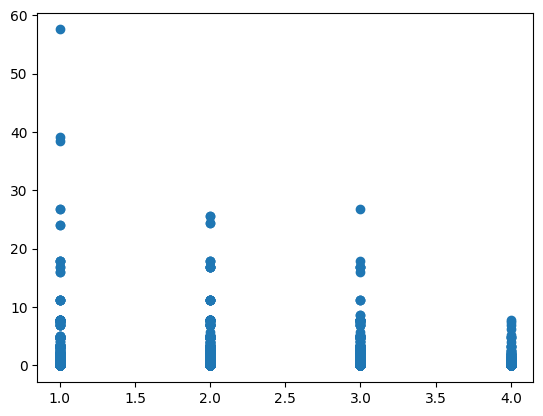

In [44]:
from matplotlib import pylab as plt

%matplotlib inline
plt.scatter(data['religious'], data['affairs'])
plt.show()

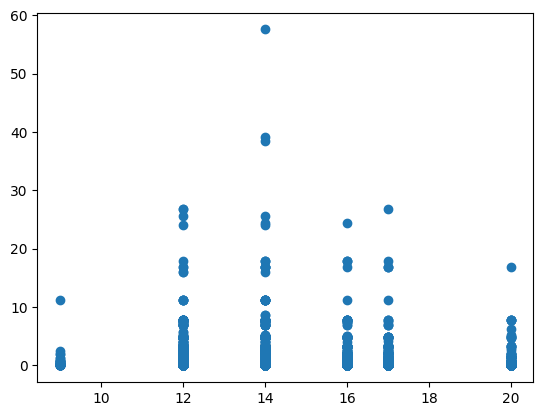

In [45]:
from matplotlib import pylab as plt

%matplotlib inline
plt.scatter(data['educ'], data['affairs'])
plt.show()

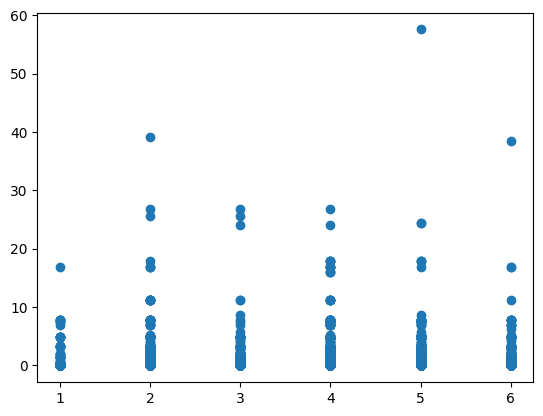

In [47]:
from matplotlib import pylab as plt

%matplotlib inline
plt.scatter(data['occupation_husb'], data['affairs'])
plt.show()

In [16]:
from sklearn import metrics
X = data.drop('affairs', axis=1)

y = data['affairs']
regressor = LinearRegression()
regressor.fit(X, y)
#pred = regressor.predict(X)

from sklearn.model_selection import cross_val_score
clf = regressor
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[-0.22867743  0.0034017   0.          0.          0.        ]
-0.05 accuracy with a standard deviation of 0.09


In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain) #маштабирование
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)
print(ypred_test)

[ 1.62840319  0.99890747 -0.3778688  ...  0.07842188  0.27462884
  1.04278385]


In [6]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,rate_marriage,-0.391918
1,age,-0.041299
2,yrs_married,-0.146714
3,children,-0.034568
4,religious,-0.226906
5,educ,-0.045958
6,occupation,0.060576
7,occupation_husb,-0.009272


In [7]:
r2_score(ytrain,ypred_train), r2_score(ytest,ypred_test)

(0.053095733679142776, 0.060139396265768696)

In [17]:
data.drop(['occupation', 'educ', 'children', 'yrs_married'], axis = 1, inplace=True)

In [18]:
X = data.drop('affairs', axis=1)

y = data['affairs']
regressor = LinearRegression()
regressor.fit(X, y)
#pred = regressor.predict(X)

from sklearn.model_selection import cross_val_score
clf = regressor
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[-0.22924697  0.00295429  0.          0.          0.        ]
-0.05 accuracy with a standard deviation of 0.09


# Задание 3. 

Поработайте с датасетом House Sales in King County. Обратите внимание, что не все признаки в датасете полезны. Целевая переменная - очевидно, price. 

In [ ]:
#your code here